In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt                                     # Importing pyplot interface using matplotlib
%matplotlib inline

In [2]:
data_train = pd.read_csv("C:/Users/gargi/OneDrive/Desktop/Flight-Passengers-Satisfaction-Prediction/cust_train.csv")

In [3]:
data_test = pd.read_csv("C:/Users/gargi/OneDrive/Desktop/Flight-Passengers-Satisfaction-Prediction/cust_test.csv")

In [4]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83123 entries, 0 to 83122
Data columns (total 24 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   id                                 83123 non-null  int64  
 1   Gender                             83123 non-null  object 
 2   Customer Type                      83123 non-null  object 
 3   Age                                83123 non-null  int64  
 4   Type of Travel                     83123 non-null  object 
 5   Class                              83123 non-null  object 
 6   Flight Distance                    83123 non-null  int64  
 7   Inflight wifi service              83123 non-null  int64  
 8   Departure/Arrival time convenient  83123 non-null  int64  
 9   Ease of Online booking             83123 non-null  int64  
 10  Gate location                      83123 non-null  int64  
 11  Food and drink                     83123 non-null  int

In [5]:
data_train.head()

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,51032,Female,Loyal Customer,30,Personal Travel,Eco,193,3,4,0,...,5,4,5,3,4,4,5,0,0.0,neutral or dissatisfied
1,54504,Female,Loyal Customer,51,Business travel,Eco,925,2,1,1,...,2,2,2,2,3,2,3,47,29.0,neutral or dissatisfied
2,13387,Male,disloyal Customer,27,Business travel,Eco,505,0,0,0,...,1,5,5,2,3,2,1,0,0.0,satisfied
3,17388,Female,Loyal Customer,52,Business travel,Business,2953,2,2,2,...,5,5,5,5,4,5,5,10,2.0,satisfied
4,91598,Female,disloyal Customer,15,Business travel,Eco,1352,4,4,4,...,2,4,3,5,3,5,2,0,0.0,satisfied


In [6]:
data_train.isnull().sum()

id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             251
satisfaction                           0
dtype: int64

In [7]:
data_test.isnull().sum()

id                                    0
Gender                                0
Customer Type                         0
Age                                   0
Type of Travel                        0
Class                                 0
Flight Distance                       0
Inflight wifi service                 0
Departure/Arrival time convenient     0
Ease of Online booking                0
Gate location                         0
Food and drink                        0
Online boarding                       0
Seat comfort                          0
Inflight entertainment                0
On-board service                      0
Leg room service                      0
Baggage handling                      0
Checkin service                       0
Inflight service                      0
Cleanliness                           0
Departure Delay in Minutes            0
Arrival Delay in Minutes             59
dtype: int64

In [9]:
data_train.nunique()

id                                   83123
Gender                                   2
Customer Type                            2
Age                                     75
Type of Travel                           2
Class                                    3
Flight Distance                       3769
Inflight wifi service                    6
Departure/Arrival time convenient        6
Ease of Online booking                   6
Gate location                            6
Food and drink                           6
Online boarding                          6
Seat comfort                             6
Inflight entertainment                   6
On-board service                         6
Leg room service                         6
Baggage handling                         5
Checkin service                          6
Inflight service                         6
Cleanliness                              6
Departure Delay in Minutes             419
Arrival Delay in Minutes               429
satisfactio

In [14]:
data_train.describe()

,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,83123.000000,83123.000000,83123.000000,83123.000000,83123.000000,83123.000000,83123.000000,83123.000000,83123.000000,83123.000000,83123.000000,83123.000000,83123.000000,83123.000000,83123.000000,83123.000000,83123.000000,83123.000000,82872.000000
mean,64971.539574,39.351106,1190.686753,2.732553,3.062269,2.756385,2.978057,3.205286,3.252842,3.442790,3.362992,3.383636,3.351407,3.634313,3.308194,3.643865,3.291351,14.714556,15.063121
std,37465.886717,15.099487,998.640016,1.329950,1.526983,1.401047,1.279064,1.330482,1.350905,1.318317,1.331880,1.287778,1.313365,1.178930,1.264747,1.173351,1.313560,38.108874,38.475487
min,1.000000,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32552.500000,27.000000,413.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,64864.000000,40.000000,844.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,97430.500000,51.000000,1744.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,129880.000000,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


In [22]:
data_train.skew()

C:\Users\gargi\AppData\Local\Temp\ipykernel_21612\3869386678.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data_train.skew()


id                                   0.002264
Age                                 -0.006553
Flight Distance                      1.108657
Inflight wifi service                0.038675
Departure/Arrival time convenient   -0.335497
Ease of Online booking              -0.018196
Gate location                       -0.059396
Food and drink                      -0.152690
Online boarding                     -0.457685
Seat comfort                        -0.486340
Inflight entertainment              -0.367411
On-board service                    -0.419734
Leg room service                    -0.349383
Baggage handling                    -0.677718
Checkin service                     -0.367859
Inflight service                    -0.691739
Cleanliness                         -0.302929
Departure Delay in Minutes           6.980063
Arrival Delay in Minutes             6.829916
dtype: float64

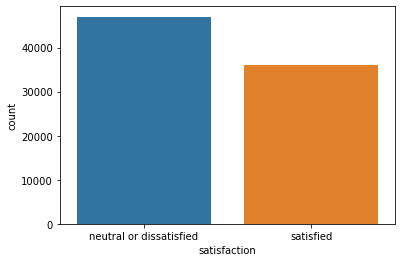

In [21]:
# Plot a displot on target variable
sns.countplot(x='satisfaction', data=data_train)
plt.show()

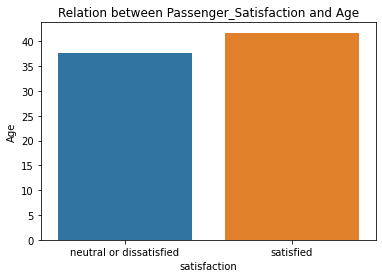

In [31]:
sns.barplot(x = 'satisfaction', y = 'Age', data = data_train, ci = None)
plt.title('Relation between Passenger_Satisfaction and Age')
plt.show()

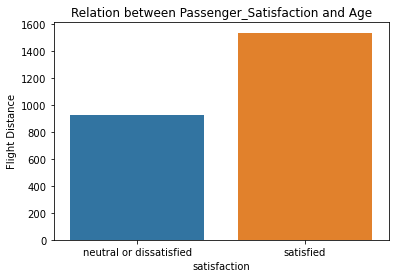

In [32]:
sns.barplot(x = 'satisfaction', y = 'Flight Distance', data = data_train, ci = None)
plt.title('Relation between Passenger_Satisfaction and Age')
plt.show()

<AxesSubplot:>

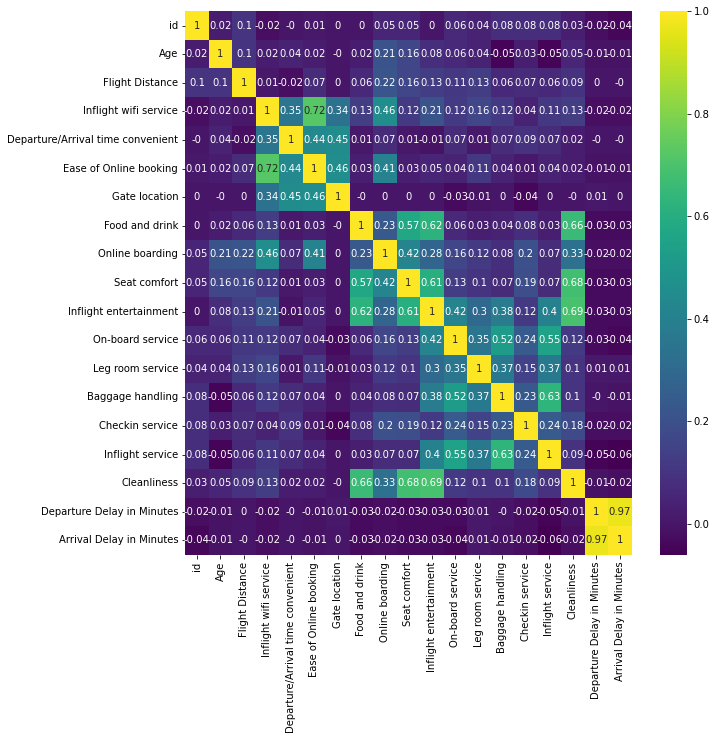

In [33]:
corr_mat = data_train.corr().round(2)
plt.figure(figsize=(10,10))
sns.heatmap(corr_mat, annot=True, cmap='viridis')

In [36]:
x = data_train.iloc[:,1:22]
y = data_train['satisfaction']

In [37]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV

In [38]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.3, random_state = 123)
x_train.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes
55397,Male,Loyal Customer,51,Business travel,Business,2586,3,3,3,3,...,1,2,3,3,3,3,1,3,2,3
6458,Female,disloyal Customer,22,Business travel,Eco,571,3,0,2,3,...,2,4,4,4,1,4,4,5,4,0
28889,Female,Loyal Customer,54,Business travel,Business,1587,5,5,5,5,...,5,4,4,4,5,4,3,4,4,0
67055,Male,disloyal Customer,27,Business travel,Eco,147,1,2,1,3,...,1,4,4,1,4,4,2,3,4,41
1970,Female,Loyal Customer,46,Personal Travel,Eco,372,2,5,2,3,...,5,5,3,3,2,3,1,3,2,0


In [40]:
#categorial colums 
x_train_cat = x_train.select_dtypes(include =["object"])
x_test_cat = x_test.select_dtypes(include=["object"])

In [39]:
# numeric Columns 
x_train_con = x_train.select_dtypes(exclude =["object"])
x_test_con = x_test.select_dtypes(exclude=["object"])

In [41]:
#One Hot Encoding
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(drop='first', sparse = False)
enc.fit(x_train_cat)
enc.fit(x_train_cat)

enc.categories_

[array(['Female', 'Male'], dtype=object),
 array(['Loyal Customer', 'disloyal Customer'], dtype=object),
 array(['Business travel', 'Personal Travel'], dtype=object),
 array(['Business', 'Eco', 'Eco Plus'], dtype=object)]

In [42]:
#transform train and test data using OHE
X_train_OHE = pd.DataFrame(enc.transform(x_train_cat), columns = enc.get_feature_names_out(x_train_cat.columns), index = x_train_cat.index)
X_test_OHE = pd.DataFrame(enc.transform(x_test_cat), columns = enc.get_feature_names_out(x_train_cat.columns), index = x_test_cat.index)


In [43]:
X_train_comb = pd.concat([X_train_OHE,x_train_con], axis=1)
X_test_comb = pd.concat([X_test_OHE,x_test_con], axis=1)

In [49]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [45]:
rf = RandomForestClassifier(verbose = 1, random_state = 123) 
rf.fit(X_train_comb,y_train)
peds_rf_train = rf.predict(X_train_comb)
peds_rf_test = rf.predict(X_test_comb)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    5.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.3s finished


In [47]:
def model_evaluation(actual, predicted):
    
    acc_score = accuracy_score(actual,predicted)
    cm_matrix = confusion_matrix(actual, predicted)
    clas_rep = classification_report(actual, predicted)
    
    print("Accuracy Score : ", round(acc_score,2))
    print("Confusion Matrix : ")
    print(cm_matrix)
    
    print(clas_rep)     

In [50]:
model_evaluation(y_train, peds_rf_train)

Accuracy Score :  1.0
Confusion Matrix : 
[[32880     0]
 [    0 25306]]
                         precision    recall  f1-score   support

neutral or dissatisfied       1.00      1.00      1.00     32880
              satisfied       1.00      1.00      1.00     25306

               accuracy                           1.00     58186
              macro avg       1.00      1.00      1.00     58186
           weighted avg       1.00      1.00      1.00     58186



In [51]:
model_evaluation(y_test, peds_rf_test)

Accuracy Score :  0.96
Confusion Matrix : 
[[13806   318]
 [  693 10120]]
                         precision    recall  f1-score   support

neutral or dissatisfied       0.95      0.98      0.96     14124
              satisfied       0.97      0.94      0.95     10813

               accuracy                           0.96     24937
              macro avg       0.96      0.96      0.96     24937
           weighted avg       0.96      0.96      0.96     24937



In [53]:
data_test.isnull().sum()

id                                    0
Gender                                0
Customer Type                         0
Age                                   0
Type of Travel                        0
Class                                 0
Flight Distance                       0
Inflight wifi service                 0
Departure/Arrival time convenient     0
Ease of Online booking                0
Gate location                         0
Food and drink                        0
Online boarding                       0
Seat comfort                          0
Inflight entertainment                0
On-board service                      0
Leg room service                      0
Baggage handling                      0
Checkin service                       0
Inflight service                      0
Cleanliness                           0
Departure Delay in Minutes            0
Arrival Delay in Minutes             59
dtype: int64

In [55]:
data_test1 = data_test.copy()
data_test1 = data_test1.drop(['id','Arrival Delay in Minutes'], axis = 1)
test_cat = data_test1.select_dtypes(include=['object'])
test_cont = data_test1.select_dtypes(exclude=['object'])
test_OHE = pd.DataFrame(enc.transform(test_cat), columns = enc.get_feature_names_out(test_cat.columns), index = test_cat.index)

test_comb = pd.concat([test_OHE,test_cont], axis=1)

In [56]:
pred_satisfaction = rf.predict(test_comb)
df = pd.DataFrame(data = pred_satisfaction)
df.columns = ['satisfaction']

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.2s finished


In [58]:
submission_df = pd.DataFrame(data = data_test, columns = ["id"])
submission_df['satisfaction'] = df['satisfaction']


In [60]:
submission_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20781 entries, 0 to 20780
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            20781 non-null  int64 
 1   satisfaction  20781 non-null  object
dtypes: int64(1), object(1)
memory usage: 324.8+ KB


In [61]:
submission_df.to_csv("Submission.csv", index = False, header = False)